<a href="https://colab.research.google.com/github/Mahnoor-14/Customer-Segmentation-for-a-Telecom-Operator/blob/main/Customer_Segmentation_for_a_Telecom_Operator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

try:
    df = pd.read_csv('/content/drive/MyDrive/ATom/ML_Case_Study_CustomerSegmentation/telco.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'telco.csv' not found. Please ensure the file exists in the current directory.")
except pd.errors.ParserError:
    print("Error: Could not parse 'telco.csv'. Please check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


(7043, 21)


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
df["TotalCharges"].value_counts()

,count
TotalCharges,
,11
20.2,11
19.75,9
20.05,8
19.9,8
...,...
130.15,1
3211.9,1
7843.55,1


In [4]:
# Check for missing values in 'TotalCharges'
print(df['TotalCharges'].isnull().sum())

# Check for non-numeric values in 'TotalCharges'
print(df[pd.to_numeric(df['TotalCharges'], errors='coerce').isnull()])
print(df.isnull().sum())

0
      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ..

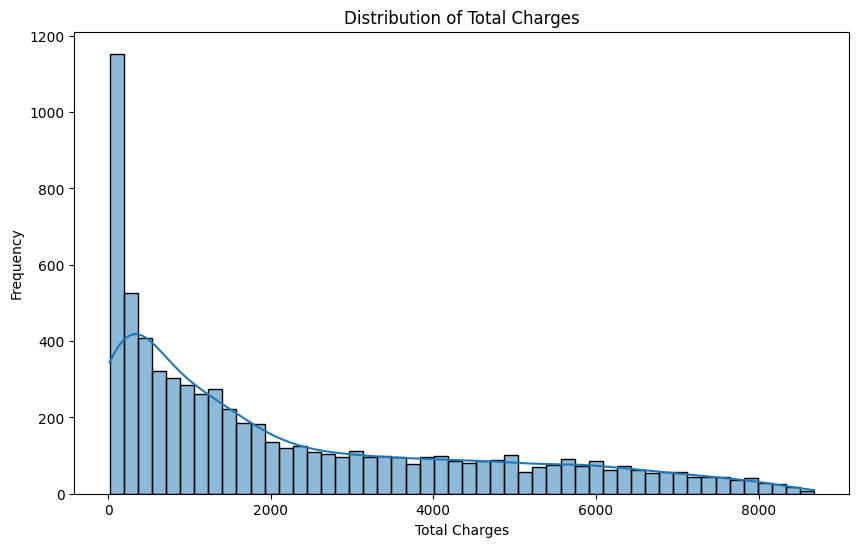

In [7]:
#historgram of total charge column
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'TotalCharges' to numeric, coercing errors to NaN
df['TotalCharges_numeric'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['TotalCharges_numeric'], bins=50, kde=True)
plt.title('Distribution of Total Charges')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.show()

In [8]:
# Check for missing values in 'TotalCharges'
print(df['TotalCharges'].isnull().sum())

# Check for non-numeric values in 'TotalCharges'
print(df[pd.to_numeric(df['TotalCharges'], errors='coerce').isnull()])

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Impute missing 'TotalCharges' with the median
median_total_charges = df['TotalCharges'].median()
df['TotalCharges'] = df['TotalCharges'].fillna(median_total_charges)

# Verify imputation
print(df['TotalCharges'].isnull().sum())

0
      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ..

In [9]:
# Feature Selection (example - adjust based on further analysis)
features_to_use = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']
df_selected = df[features_to_use]

# Encoding categorical features
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
df_encoded = pd.get_dummies(df_selected, columns=categorical_cols, drop_first=True)
#Scaling
from sklearn.preprocessing import StandardScaler

numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

display(df_encoded.head())

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,-1.277445,-1.160323,-0.994242,False,True,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
1,0,0.066327,-0.259629,-0.173244,True,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0,-1.236724,-0.362660,-0.959674,True,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True
3,0,0.514251,-0.746535,-0.194766,True,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
4,0,-1.236724,0.197365,-0.940470,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False


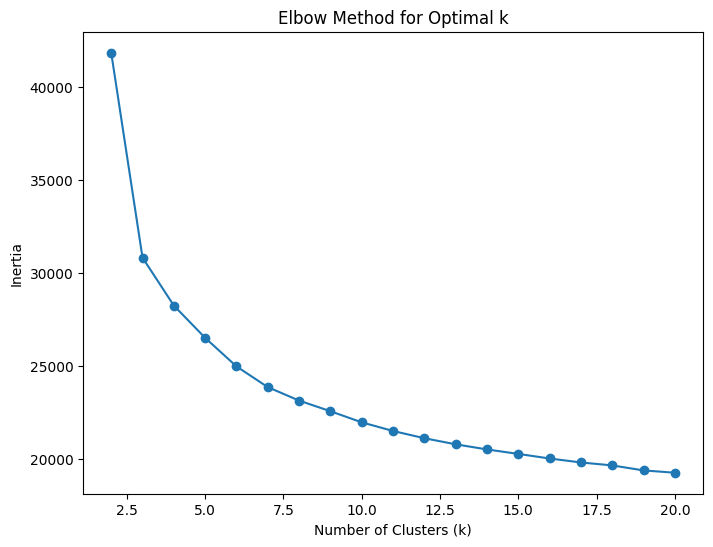

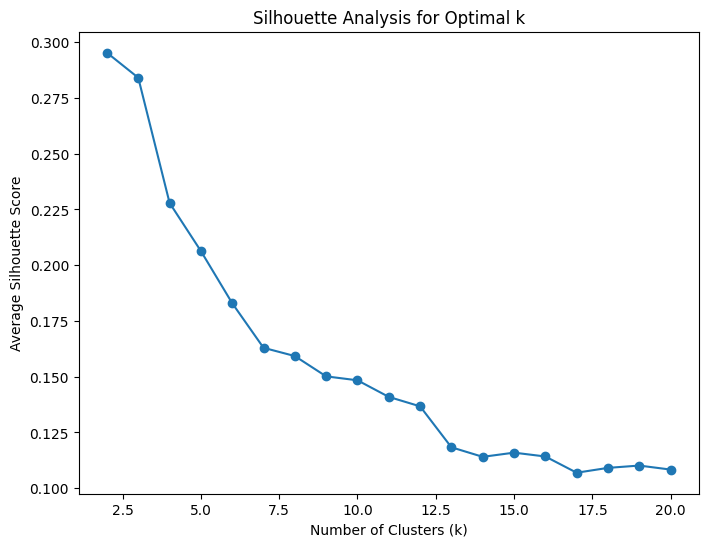

In [10]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = []
silhouette_scores = []
k_values = range(2, 21)  # Test k values from 2 to 20

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # Use a consistent random state for reproducibility
    kmeans.fit(df_encoded)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_encoded, kmeans.labels_))

# Plot inertia
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Plot silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Analysis for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.show()

In [11]:
# Choose k based on the Elbow and Silhouette plots (example: k=3)
k = 3

# Apply KMeans clustering
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df_encoded['cluster'] = kmeans.fit_predict(df_encoded)

# Validate cluster stability (example: run with 5 different random seeds)
stability_scores = []
for seed in range(5):
    kmeans_stable = KMeans(n_clusters=k, random_state=seed, n_init=10)
    labels_stable = kmeans_stable.fit_predict(df_encoded.drop('cluster', axis=1))  # Exclude the existing cluster labels
    stability_scores.append(silhouette_score(df_encoded.drop('cluster', axis=1), labels_stable))

print(f"Cluster stability scores across different random seeds: {stability_scores}")

# Assign cluster labels to the original DataFrame
df['cluster'] = df_encoded['cluster']
display(df.head())

Cluster stability scores across different random seeds: [np.float64(0.2841212273779714), np.float64(0.2841212273779714), np.float64(0.28408036880744275), np.float64(0.28411166463195053), np.float64(0.28410481958148837)]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalCharges_numeric,cluster
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,No,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,108.15,0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,151.65,0


**Reasoning**:
I need to profile the clusters by calculating summary statistics for key features and identify distinctive traits of each cluster.



In [12]:
# Cluster Profiling
cluster_profiles = []
for cluster_num in range(k):
    cluster_data = df[df['cluster'] == cluster_num]
    profile = {
        'cluster': cluster_num,
        'size': len(cluster_data),
    }
    for col in ['tenure', 'MonthlyCharges', 'TotalCharges']:
        profile[col + '_mean'] = cluster_data[col].mean()
        profile[col + '_median'] = cluster_data[col].median()
    for col in ['InternetService', 'Contract', 'PaymentMethod']:
      profile[col + '_counts'] = cluster_data[col].value_counts().to_dict()
    cluster_profiles.append(profile)

cluster_profile_df = pd.DataFrame(cluster_profiles)
display(cluster_profile_df)

# Identify distinctive traits and assign business labels (example)
# This part requires careful analysis of the cluster profiles.
# Replace these examples with actual insights from your analysis.
business_labels = {
    0: "Budget-conscious",
    1: "Mid-range loyalists",
    2: "High-value users"
}

print("Cluster Profiles with Business Labels:")
for profile in cluster_profiles:
  print(f"Cluster {profile['cluster']} ({business_labels[profile['cluster']]} ): {profile}")

,cluster,size,tenure_mean,tenure_median,MonthlyCharges_mean,MonthlyCharges_median,TotalCharges_mean,TotalCharges_median,InternetService_counts,Contract_counts,PaymentMethod_counts
0,0,3265,15.559571,12.0,67.989296,70.40,1035.465199,816.8,"{'Fiber optic': 1666, 'DSL': 1599}","{'Month-to-month': 2759, 'One year': 408, 'Two...","{'Electronic check': 1576, 'Mailed check': 703..."
1,1,2252,57.980906,60.0,89.682371,93.35,5182.605373,5017.8,"{'Fiber optic': 1430, 'DSL': 822}","{'Two year': 959, 'One year': 701, 'Month-to-m...","{'Bank transfer (automatic)': 714, 'Credit car..."
2,2,1526,30.547182,25.0,21.079194,20.15,668.099443,528.5,{'No': 1526},"{'Two year': 638, 'Month-to-month': 524, 'One ...","{'Mailed check': 741, 'Bank transfer (automati..."


Cluster Profiles with Business Labels:
Cluster 0 (Budget-conscious ): {'cluster': 0, 'size': 3265, 'tenure_mean': np.float64(15.559571209800918), 'tenure_median': 12.0, 'MonthlyCharges_mean': np.float64(67.98929555895864), 'MonthlyCharges_median': 70.4, 'TotalCharges_mean': np.float64(1035.4651990811637), 'TotalCharges_median': 816.8, 'InternetService_counts': {'Fiber optic': 1666, 'DSL': 1599}, 'Contract_counts': {'Month-to-month': 2759, 'One year': 408, 'Two year': 98}, 'PaymentMethod_counts': {'Electronic check': 1576, 'Mailed check': 703, 'Bank transfer (automatic)': 498, 'Credit card (automatic)': 488}}
Cluster 1 (Mid-range loyalists ): {'cluster': 1, 'size': 2252, 'tenure_mean': np.float64(57.980905861456485), 'tenure_median': 60.0, 'MonthlyCharges_mean': np.float64(89.68237122557727), 'MonthlyCharges_median': 93.35, 'TotalCharges_mean': np.float64(5182.605373001777), 'TotalCharges_median': 5017.799999999999, 'InternetService_counts': {'Fiber optic': 1430, 'DSL': 822}, 'Contract_

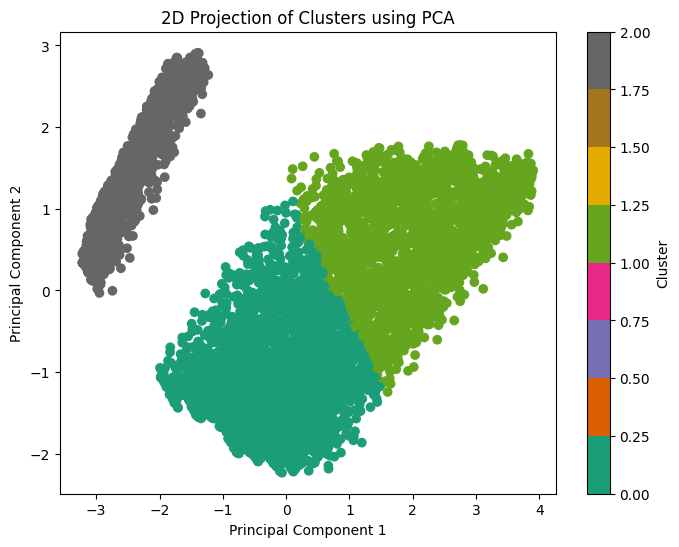

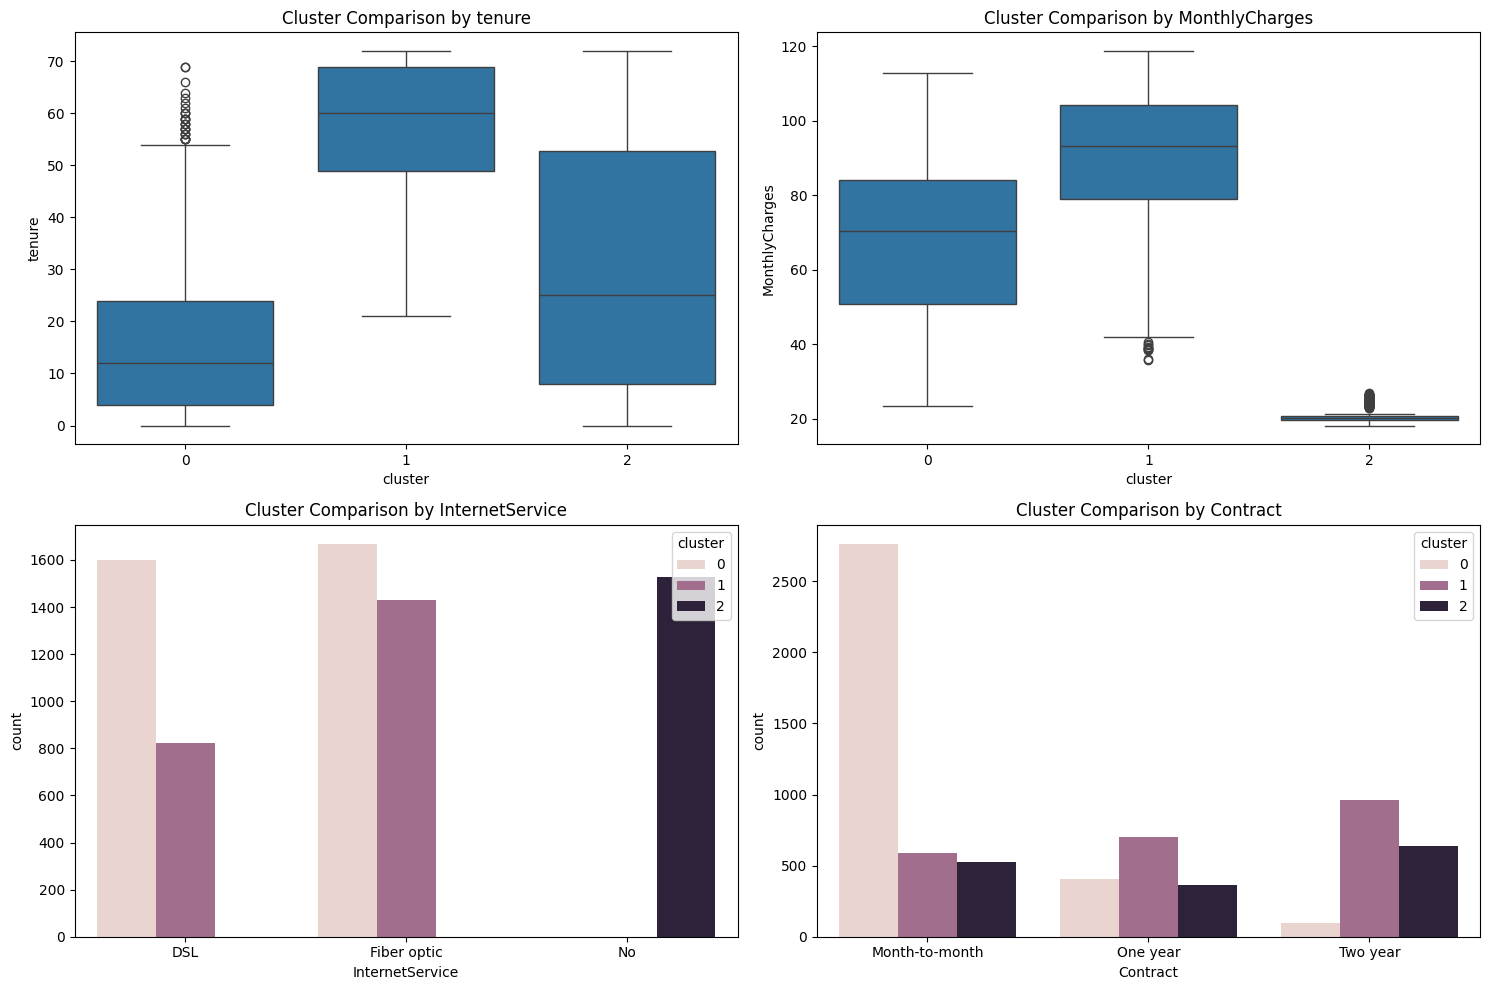

In [20]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

# 2D Projection using PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_encoded.drop('cluster', axis=1))

plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df_encoded['cluster'],cmap = 'Dark2')
plt.title('2D Projection of Clusters using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Feature comparison charts
features_to_plot = ['tenure', 'MonthlyCharges', 'InternetService', 'Contract']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, feature in enumerate(features_to_plot):
    if feature in ['tenure', 'MonthlyCharges']:
        sns.boxplot(x='cluster', y=feature, data=df, ax=axes[i])
    else:
        sns.countplot(x=feature, hue='cluster', data=df, ax=axes[i])
    axes[i].set_title(f'Cluster Comparison by {feature}')

plt.tight_layout()
plt.show()

In [27]:

# meaningful labels based on prior profiling
df['Segment'] = df['cluster'].map({
    0: 'Budget-Conscious',
    1: 'High-Value Users',
    2: 'New or Exploratory Users'
})

# Grouping by segment and examining important features
segment_summary = df.groupby('Segment').agg({
    'MonthlyCharges': ['mean', 'min', 'max'],
    'TotalCharges': ['mean'],
    'tenure': ['mean'],
    'Contract': lambda x: x.value_counts().index[0],
    'PaymentMethod': lambda x: x.value_counts().index[0],
})
print("Segment Summary:")
print(segment_summary)

# Churn rate per segment
if 'Churn' in df.columns:
    churn_by_segment = df.groupby('Segment')['Churn'].value_counts(normalize=True).unstack()
    print("\\nChurn Rate by Segment:")
    print(churn_by_segment)

# ARPU per segment
arpu_by_segment = df.groupby('Segment')['MonthlyCharges'].mean()
print("\\nARPU by Segment:")
print(arpu_by_segment)


Segment Summary:
                         MonthlyCharges                TotalCharges  \
                                   mean    min     max         mean   
Segment                                                               
Budget-Conscious              67.989296  23.45  112.95  1035.465199   
High-Value Users              89.682371  35.70  118.75  5182.605373   
New or Exploratory Users      21.079194  18.25   26.90   668.099443   

                             tenure        Contract              PaymentMethod  
                               mean        <lambda>                   <lambda>  
Segment                                                                         
Budget-Conscious          15.559571  Month-to-month           Electronic check  
High-Value Users          57.980906        Two year  Bank transfer (automatic)  
New or Exploratory Users  30.547182        Two year               Mailed check  
\nChurn Rate by Segment:
Churn                           No       Yes


<ipython-input-26-2332076515>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment', y='MonthlyCharges', data=segment_summary, ax=axs[0, 0], palette='Blues_d')
<ipython-input-26-2332076515>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment', y='TotalCharges', data=segment_summary, ax=axs[0, 1], palette='Greens_d')
<ipython-input-26-2332076515>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment', y='tenure', data=segment_summary, ax=axs[1, 0], palette='Oranges_d')
<ipython-input-26-2332076515>:46: UserWarning: Gly

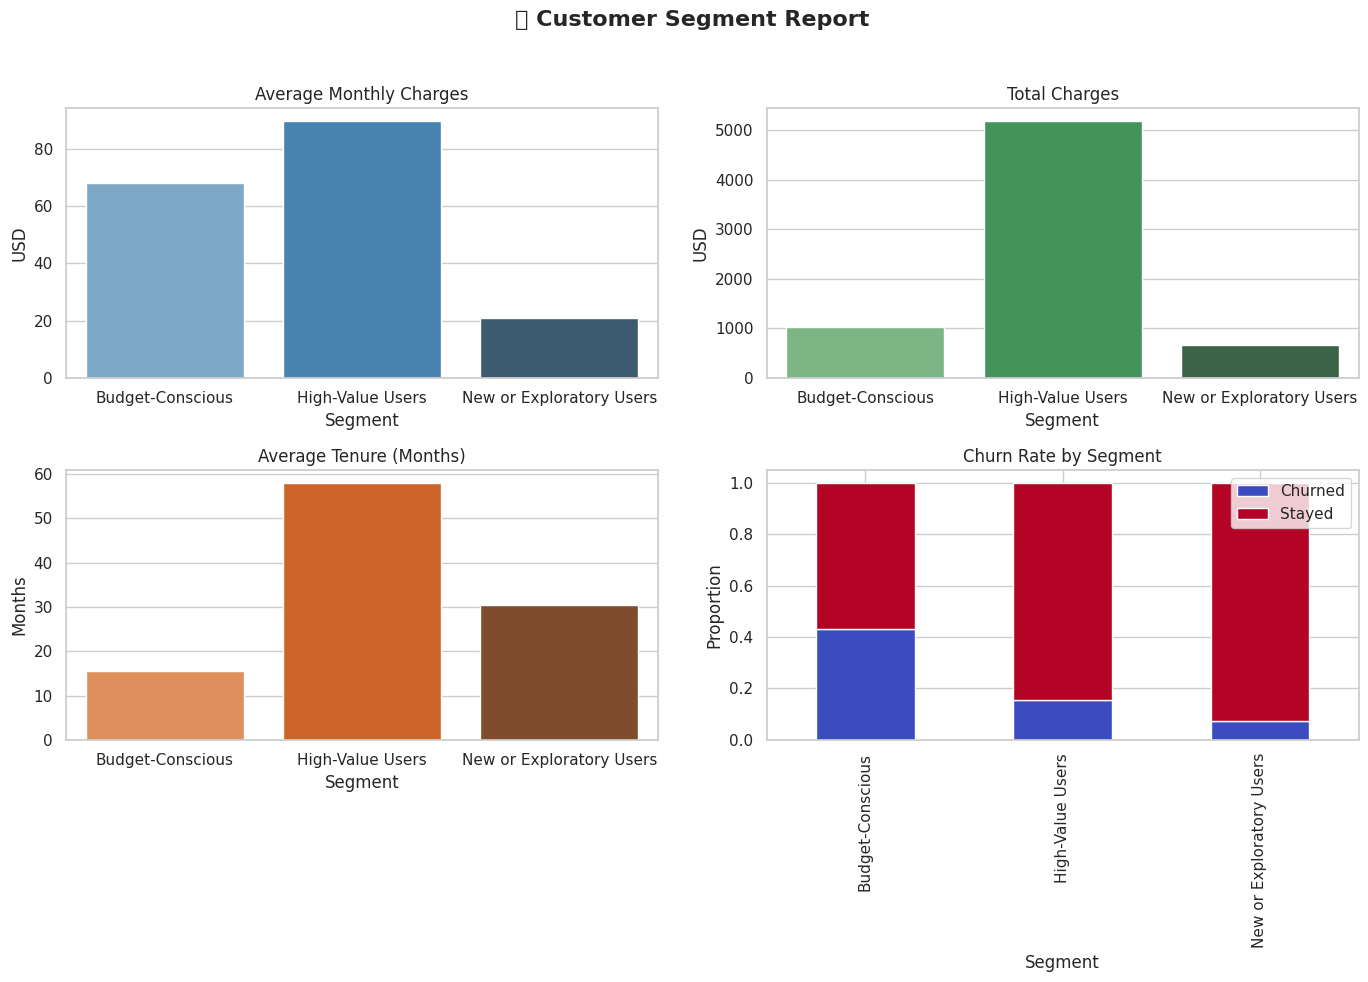

In [26]:


# Group data by segment
segment_summary = df.groupby('Segment').agg({
    'MonthlyCharges': 'mean',
    'TotalCharges': 'mean',
    'tenure': 'mean'
})

# Churn distribution
churn_dist = df.groupby('Segment')['Churn'].value_counts(normalize=True).unstack().fillna(0)
segment_summary['Churn_Yes'] = churn_dist['Yes']
segment_summary['Churn_No'] = churn_dist['No']

# Optional: Add ARPU as the same as MonthlyCharges
segment_summary['ARPU'] = segment_summary['MonthlyCharges']

# Reset index for plotting
segment_summary.reset_index(inplace=True)

#
sns.set(style="whitegrid")
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('📊 Customer Segment Report', fontsize=16, weight='bold')

# Monthly Charges
sns.barplot(x='Segment', y='MonthlyCharges', data=segment_summary, ax=axs[0, 0], palette='Blues_d')
axs[0, 0].set_title("Average Monthly Charges")
axs[0, 0].set_ylabel("USD")

#Total Charges
sns.barplot(x='Segment', y='TotalCharges', data=segment_summary, ax=axs[0, 1], palette='Greens_d')
axs[0, 1].set_title("Total Charges")
axs[0, 1].set_ylabel("USD")

# Tenure
sns.barplot(x='Segment', y='tenure', data=segment_summary, ax=axs[1, 0], palette='Oranges_d')
axs[1, 0].set_title("Average Tenure (Months)")
axs[1, 0].set_ylabel("Months")

# Churn Rate (stacked bar)
churn_plot_data = segment_summary[['Segment', 'Churn_Yes', 'Churn_No']].set_index('Segment')
churn_plot_data.plot(kind='bar', stacked=True, ax=axs[1, 1], colormap='coolwarm')
axs[1, 1].set_title("Churn Rate by Segment")
axs[1, 1].legend(["Churned", "Stayed"])
axs[1, 1].set_ylabel("Proportion")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
